In [2]:
#importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


#import the data  
data=pd.read_csv(r"c:\Users\User\Downloads\amazon_products_sales_data_cleaned.csv")

#first five column of data 
data.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [3]:
#shape 
data.shape

(42675, 17)

In [4]:
## let cheak the data type of  all columns and along with finding wheather they contain null value or not 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

In [5]:
##we see that columne brand ,category , user id , item id has object data type but it is string so we change it into string
data['brand']=data['product_title'].astype(str)



data['category']=data['product_category'].astype(str)

## now we  see that column rating has int69 data type but its actually float  so we change it to as float 
data['rating']=data['product_rating'].astype(float)


##now we see that column timestamp is obect but it actually timestamp so we convert it into timestamp 
from datetime import datetime
data['timestamp']=pd.to_datetime(data['delivery_date'])

In [6]:
data

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,...,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,brand,category,rating,timestamp
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,...,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,Phones,4.6,2025-09-01
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,...,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",Laptops,4.3,2025-08-29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,...,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",Laptops,4.6,2025-09-01
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,...,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",Phones,4.6,NaT
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,...,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,Apple AirTag 4 Pack. Keep Track of and find Yo...,Phones,4.8,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100.0,195.99,195.99,No Badge,Organic,No Coupon,NaN,...,NaN,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",TV & Display,5.0,2025-09-04
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200.0,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,...,NaN,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00,"Arlo Essential Spotlight Camera, Wireless Secu...",Cameras,4.2,2025-09-04
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50.0,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,...,NaN,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",Chargers & Cables,4.3,2025-09-04
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,...,NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,Chargers & Cables,4.7,2025-09-04


In [7]:
#for better understand of data
data.describe()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage,rating,timestamp
count,41651.000000,41651.000000,32164.000000,40613.000000,40613.000000,40613.000000,41651.000000,30692
mean,4.399431,3087.106000,1293.665278,243.227289,257.611107,6.547151,4.399431,2025-09-04 06:42:02.298970624
min,1.000000,1.000000,50.000000,2.160000,2.160000,0.000000,1.000000,2025-08-27 00:00:00
25%,4.200000,82.000000,100.000000,29.690000,32.990000,0.000000,4.200000,2025-09-02 00:00:00
50%,4.500000,343.000000,200.000000,84.990000,89.000000,0.000000,4.500000,2025-09-03 00:00:00
75%,4.700000,1886.000000,400.000000,224.000000,229.990000,8.490000,4.700000,2025-09-04 00:00:00
max,5.000000,865598.000000,100000.000000,5449.000000,5449.000000,85.420000,5.000000,2025-09-29 00:00:00
std,0.386997,13030.460133,6318.323574,473.351545,496.633495,12.744715,0.386997,NaN


In [8]:
#now we see the no of unique user and item in data 
data.nunique()

product_title            8808
product_rating             31
total_reviews            4413
purchased_last_month       29
discounted_price         3558
original_price           3151
is_best_seller             12
is_sponsored                2
has_coupon                 42
buy_box_availability        1
delivery_date              24
sustainability_tags        16
product_image_url        8038
product_page_url        40606
data_collected_at        1559
product_category           15
discount_percentage      1526
brand                    8808
category                   15
rating                     31
timestamp                  24
dtype: int64

In [9]:
#cheaking duplicates_value
data.duplicated().sum()

np.int64(0)

In [10]:
#cheaking missing value
data.isnull().sum()

product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
brand                       0
category                    0
rating                   1024
timestamp               11983
dtype: int64

In [11]:
##as we see there is one columne user_attr  which is not important so we drop this column 
data.drop(['product_page_url'],inplace=True,axis=1)

In [12]:
## let us see the distributions of rating 
data.rating.value_counts()

rating
4.6    6151
4.4    5525
4.5    5359
4.7    4664
4.8    4230
4.3    2927
4.2    2837
4.1    1959
4.0    1465
3.9    1316
3.8    1083
5.0     995
4.9     704
3.6     666
3.7     604
3.2     363
3.5     242
3.4     216
3.0     148
2.0     143
2.7      15
1.5      15
3.3       6
2.8       4
1.0       4
2.4       3
2.9       2
3.1       2
2.3       1
2.5       1
2.6       1
Name: count, dtype: int64

In [13]:
data

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,data_collected_at,product_category,discount_percentage,brand,category,rating,timestamp
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,2025-08-21 11:14:29,Phones,43.60,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,Phones,4.6,2025-09-01
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,2025-08-21 11:14:29,Laptops,37.52,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",Laptops,4.3,2025-08-29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,2025-08-21 11:14:29,Laptops,10.03,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",Laptops,4.6,2025-09-01
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,2025-08-21 11:14:29,Phones,0.00,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",Phones,4.6,NaT
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,2025-08-21 11:14:29,Phones,0.00,Apple AirTag 4 Pack. Keep Track of and find Yo...,Phones,4.8,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100.0,195.99,195.99,No Badge,Organic,No Coupon,NaN,2025-09-04,NaN,https://m.media-amazon.com/images/I/51KCB+egEs...,2025-08-30 19:56:33,TV & Display,0.00,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",TV & Display,5.0,2025-09-04
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200.0,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/51jV+o1LZE...,2025-08-30 19:56:33,Cameras,0.00,"Arlo Essential Spotlight Camera, Wireless Secu...",Cameras,4.2,2025-09-04
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50.0,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/71ySPkNLkG...,2025-08-30 19:56:33,Chargers & Cables,18.18,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",Chargers & Cables,4.3,2025-09-04
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,2025-08-30 19:56:33,Chargers & Cables,34.98,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,Chargers & Cables,4.7,2025-09-04


here we see that most of the rating is 5

# Q : what is  best year of sale ?

In [14]:
#here we cheak the  best year of sale 
data['feat_year']=pd.DatetimeIndex(data['timestamp']).year

yearly_perfomance=data['feat_year'].value_counts()

yearly_perfomance = pd.DataFrame(yearly_perfomance.reset_index())
yearly_perfomance.rename(columns={'index': 'year'}, inplace=True)



In [15]:
##plot _useing barplot
plt.figure(figsize=(15,7))



<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

In [16]:
print(yearly_perfomance)

   feat_year  count
0     2025.0  30692


<Axes: xlabel='count', ylabel='feat_year'>

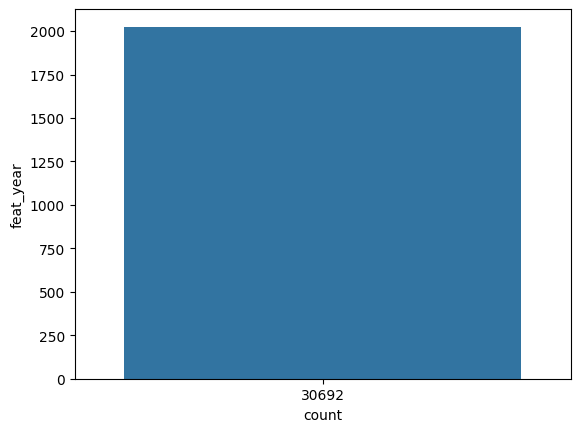

In [17]:
sns.barplot(data = yearly_perfomance, x="count" ,y="feat_year")

here wee see that 2015 has maximum numbr of sale  now we  find the month that  maximum number of sale

## Q : what is best Month of sale ?

<Axes: xlabel='count', ylabel='feat_month'>

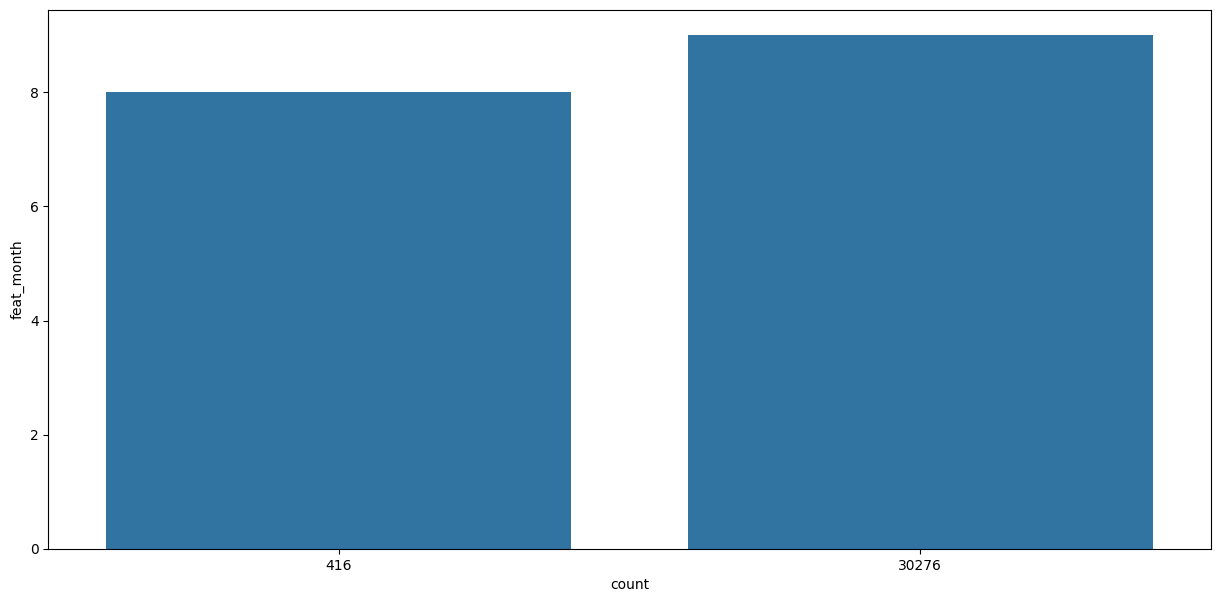

In [18]:
data['feat_month']=pd.DatetimeIndex(data['timestamp']).month


monthly_perfomance =data['feat_month'].value_counts()

monthly_perfomance=pd.DataFrame(monthly_perfomance.reset_index().rename(columns={'index':'month'}))

##plot _useing barplot
plt.figure(figsize=(15,7))

sns.barplot(data=monthly_perfomance, x="count" ,y="feat_month")



here we sew that january was the best month for sale 

## Q : what is most given rating?

<Axes: xlabel='rating', ylabel='count'>

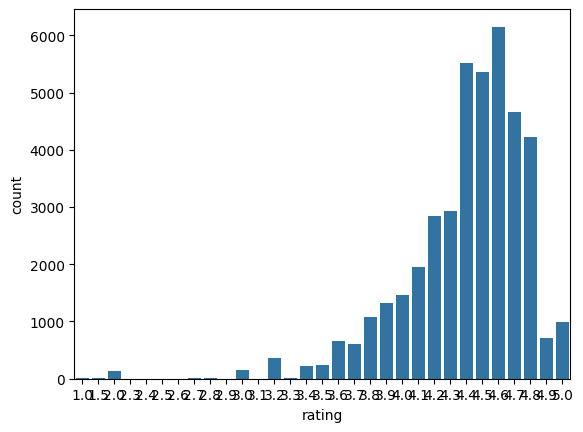

In [19]:
##find the idstribution of rating
sns.countplot(x='rating',data=data)

#Q :which  brand have high sales ?

In [20]:
Brand=pd.DataFrame(data['brand'].value_counts().reset_index())
Brand=Brand.drop([0, 1])
print(Brand.columns)
# Index(['brand_name', 'count'], dtype='object')



Index(['brand', 'count'], dtype='object')


In [21]:
Brand=Brand.rename(columns={'count':'name'})

In [22]:
Brand

,brand,name
2,TRX Training 6 Month On-Demand Membership - Un...,456
3,"KODAK 10.1 Inch WiFi Digital Picture Frame,128...",438
4,"Belkin MagSafe-Compatible Charger, 3-in-1 Wire...",377
5,"RCA 10.1"" WiFi Digital Picture Frame Uhale App...",371
6,Toshiba 20TB MG10ACA20TE SATA 600GB 20in1 HDD,254
...,...,...
8803,"Amazon Basics Multipurpose Copy Printer Paper,...",1
8804,Amazon Basics AAA Alkaline High-Performance Ba...,1
8805,Amazon Basics Clear Thermal Laminating Plastic...,1
8806,Roku Streaming Stick HD 2025 — HD Streaming De...,1


## Q: which brand have least sale?

<Axes: ylabel='brand'>

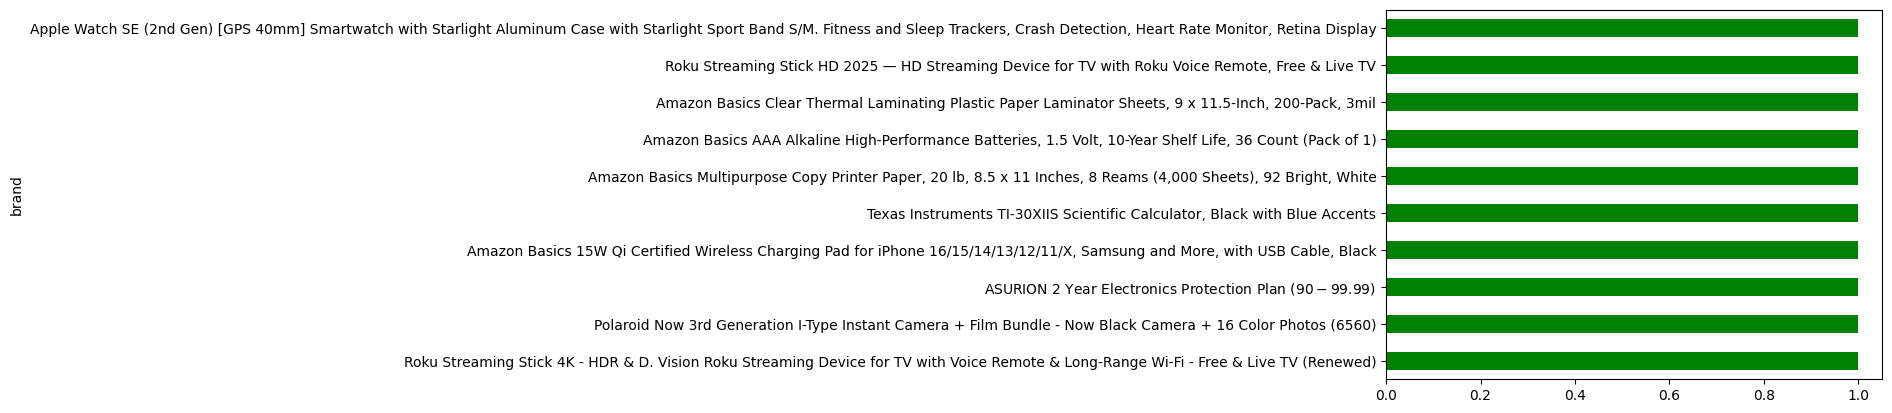

In [24]:
Brand.tail(10).set_index('brand')['name'].plot(
    kind='barh',
    color='green'
)



#Q :  which category with the least sales was Security & Surveillance while the most sales were Headphones.


<Axes: ylabel='rating'>

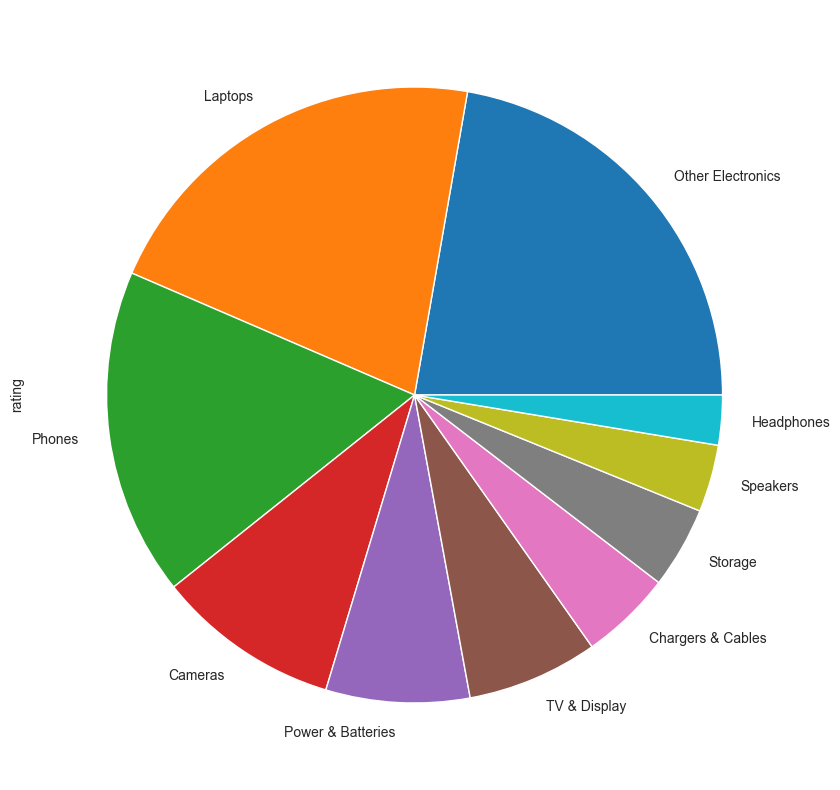

In [29]:
##understand with piechart
plt.figure(figsize=(10,10)) 
sns.set_style('white')
data.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')